# 機械学習 課題3

※ セルを増やしても構いませんが、すでに書かれているセルの内容を変更しないで下さい。

**この課題におけるベクトルは縦ベクトルとします。**

## 1. クラスタリング

$4$個の事例からなるデータ$\mathcal{D} = \{\pmb{x}_i\}_{i=1}^4$

\begin{align}
\pmb{x}_1 = \begin{pmatrix}0 \\ 0\end{pmatrix},\;
\pmb{x}_2 = \begin{pmatrix}1 \\ 1\end{pmatrix},\;
\pmb{x}_3 = \begin{pmatrix}2 \\ 1\end{pmatrix},\;
\pmb{x}_4 = \begin{pmatrix}0 \\ 2\end{pmatrix}
\end{align}

をクラスタリングしたい。以下の問に答えよ。なお、計算は手計算でもプログラムを用いてもよいが、最終的な答えに至る経過が分かるように記述せよ。数値は小数点以下第2位まで表示するか、平方根を使って表示せよ。また、クラスタを統合するときの距離が等しいなどの理由で、クラスタの作り方が2通り以上ある場合は、そのうちのいずれかを答えればよい。

In [3]:
import numpy as np
import scipy.cluster.hierarchy
import scipy.spatial.distance
from matplotlib import pyplot as plt

**(1) 距離行列の計算（マンハッタン距離）**

距離関数としてマンハッタン距離を用いて、データ$\mathcal{D}$の距離行列を求めよ。<!-- 1(1) -->

In [4]:
def Manhattan_distance(X: np.ndarray) -> np.ndarray:
    """
    Compute the Manhattan distance matrix between each pair of points
    :param X: A matrix of shape (n, 2) where each row is a point in 2D
    :return: A matrix of shape (n, n) where the (i, j)th entry is the Manhattan distance between the i-th and j-th point
    """
    n = X.shape[0]
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dists[i, j] = np.sum(np.abs(X[i] - X[j]))
    return dists

X: np.ndarray = np.array([[0, 0], [1, 1], [2, 1], [0, 2]])

Manhattan_distance(X)

array([[0., 2., 3., 2.],
       [2., 0., 1., 2.],
       [3., 1., 0., 3.],
       [2., 2., 3., 0.]])

In [6]:
D = scipy.spatial.distance.pdist(X, metric="cityblock")
scipy.spatial.distance.squareform(D)

array([[0., 2., 3., 2.],
       [2., 0., 1., 2.],
       [3., 1., 0., 3.],
       [2., 2., 3., 0.]])

**(2) 距離行列の計算（ユークリッド距離）**

距離関数としてユークリッド距離を用いて、データ$\mathcal{D}$の距離行列を求めよ。<!-- 1(2) -->

In [7]:
def distace_matrix(X: np.ndarray) -> np.ndarray:
    """
    Compute the Euclidean distance matrix between each pair of points
    :param X: A matrix of shape (n, 2) where each row is a point in 2D
    :return: A matrix of shape (n, n) where the (i, j)th entry is the distance between the i-th and j-th point
    """
    n = X.shape[0]
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dists[i, j] = np.linalg.norm(X[i] - X[j])
    return dists

distace_matrix(X)

array([[0.        , 1.41421356, 2.23606798, 2.        ],
       [1.41421356, 0.        , 1.        , 1.41421356],
       [2.23606798, 1.        , 0.        , 2.23606798],
       [2.        , 1.41421356, 2.23606798, 0.        ]])

In [8]:
D = scipy.spatial.distance.pdist(X, metric="euclidean")
scipy.spatial.distance.squareform(D)

array([[0.        , 1.41421356, 2.23606798, 2.        ],
       [1.41421356, 0.        , 1.        , 1.41421356],
       [2.23606798, 1.        , 0.        , 2.23606798],
       [2.        , 1.41421356, 2.23606798, 0.        ]])

**(3) ウォード法**

データ$\mathcal{D}$に対して、初期クラスタを$C_1 = \{\pmb{x}_1\}, C_2 = \{\pmb{x}_2\}, C_3 = \{\pmb{x}_3\}, C_4 = \{\pmb{x}_4\}$として、ウォード法（Ward's method）によるクラスタリングを行いたい。

**(a) 最初の統合**

任意の2つの異なるクラスタ $A, B, \in \{C_1, C_2, C_3, C_4\}$ $(A \neq B)$ に対して、式11.17を計算し、ウォード法で最初に統合されるクラスタの組$A^*, B^*$と、その時の式11.17の値（$\mathrm{dist}_{\mathrm{ward}}(A^*, B^*)$）を答えよ。答え方の例を以下に示す。

+ 統合されるクラスタ: $\{\pmb{x}_1\}, \{\pmb{x}_2\}$
+ 式11.17の値: 1.44
<!-- 1(3)(a) -->

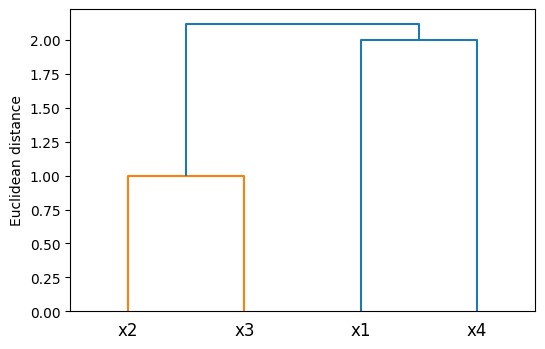

In [9]:
x1: np.ndarray = np.array([0, 0])
x2: np.ndarray = np.array([1, 1])
x3: np.ndarray = np.array([2, 1])
x4: np.ndarray = np.array([0, 2])

X = np.array([x1, x2, x3, x4])

Z = scipy.cluster.hierarchy.linkage(scipy.spatial.distance.pdist(X, metric="euclidean"), method="ward")

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=["x1", "x2", "x3", "x4"], ax=ax)
ax.set_ylabel("Euclidean distance")
plt.show()

- 結合されるクラスタ: {C2}, {C3}
- 式11.17の値: 1.00  

![](../public/ward.png)

**(b) 2回目の統合**

(a)においてクラスタの統合が行われた結果、クラスタ数は3となる。これらのクラスタを改めて$C_1, C_2, C_3$と書き直す。任意の2つの異なるクラスタに対して、式11.17を計算し、ウォード法で次に統合されるクラスタの組$A^*, B^*$と、その時の式11.17の値（$\mathrm{dist}_{\mathrm{ward}}(A^*, B^*)$）を答えよ。答え方の例を以下に示す。

+ 統合されるクラスタ: $\{\pmb{x}_1, \pmb{x}_2\}, \{\pmb{x}_3\}$
+ 式11.17の値: 1.67
<!-- 1(3)(b) -->

- 結合されるクラスタ: {C1}, {C3}
- 式11.17の値: 2.00  

## 2. 主成分分析

適切な題材を選び、主成分分析（PCA）を行った結果をまとめよ。ただし、以下の観点で採点を行うので、これらを満たすように解答せよ。また、分析に用いたプログラムもJupyter Notebookにまとめよ。

+ 選んだデータの説明
+ 累積寄与率のグラフ
+ 第一主成分と第二主成分のベクトル
+ 主成分分析から分かったこと

**(1) データの説明**

選んだデータの概要（提供者、内容、データのサイズなど）を説明せよ。<!-- 2(1) -->

**(2) 累積寄与率**

累積寄与率のグラフを描け。<!-- 2(2) -->

**(3)  第一主成分と第二主成分**

データの事例を第一主成分と第二主成分の軸に射影し、データを２次元平面上にプロットせよ。<!-- 2(3) -->

**(4) 主成分分析から分かったこと**

主成分分析からデータに関して得られた知見をまとめよ。<!-- 2(4) -->